<a href="https://colab.research.google.com/github/theagegeshidze/theagegeshidze.github.io/blob/main/heatmapedited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
# import relevant packages

In [ ]:
forex = pd.read_csv('forex.csv',
usecols=[1,5], names=['Date', 'UK_GBP'], 
skiprows=1, index_col=0, parse_dates=[0])

In [ ]:
# I used informatin from a kaggle/medium article, as I was finding the advanced learning and machine learning very difficult

In [ ]:
forex

,UK_GBP
Date,
2000-03-01,0.6146
2000-04-01,0.6109
2000-05-01,0.6092
2000-06-01,0.607
2000-07-01,0.6104
...,...
2019-12-25,ND
2019-12-26,0.7688
2019-12-27,0.7639


In [ ]:
print(forex)

            UK_GBP
Date              
2000-03-01  0.6146
2000-04-01  0.6109
2000-05-01  0.6092
2000-06-01   0.607
2000-07-01  0.6104
...            ...
2019-12-25      ND
2019-12-26  0.7688
2019-12-27  0.7639
2019-12-30   0.761
2019-12-31  0.7536

[5217 rows x 1 columns]


In [ ]:
forex['UK_GBP'] = pd.to_numeric(forex.UK_GBP, errors='coerce')
forex.dropna(inplace=True)

In [ ]:
forex

,UK_GBP
Date,
2000-03-01,0.6146
2000-04-01,0.6109
2000-05-01,0.6092
2000-06-01,0.6070
2000-07-01,0.6104
...,...
2019-12-24,0.7719
2019-12-26,0.7688
2019-12-27,0.7639


In [ ]:
forex_m = forex.copy()
forex_m['month'] = [i.month for i in forex_m.index]
forex_m['year'] = [i.year for i in forex_m.index]
# group by month and year, get the average
forex_m = forex_m.groupby(['month', 'year']).mean()

In [ ]:
forex_m

UK_GBP
month year          
1     2000  0.630915
      2001  0.685074
      2002  0.689352
      2003  0.614140
      2004  0.546086
...              ...
12    2015  0.663960
      2016  0.780327
      2017  0.759000
      2018  0.769280
      2019  0.772333

[240 rows x 1 columns]

In [ ]:
forex_m = forex_m.unstack(level=0)

In [ ]:
forex_m

UK_GBP                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   0.630915  0.638400  0.639108  0.639863  0.667595  0.663165  0.661378   
2001   0.685074  0.690390  0.696638  0.694968  0.697048  0.705068  0.700833   
2002   0.689352  0.686667  0.688343  0.681962  0.678443  0.667885  0.651400   
2003   0.614140  0.622589  0.625791  0.626100  0.611690  0.604370  0.620283   
2004   0.546086  0.538925  0.547405  0.556724  0.555065  0.546767  0.544218   
2005   0.540600  0.535572  0.534068  0.531638  0.547974  0.550095  0.562930   
2006   0.553435  0.561444  0.564688  0.554039  0.535770  0.545663  0.542409   
2007   0.504337  0.505750  0.506364  0.500042  0.503430  0.501164  0.492600   
2008   0.517925  0.520845  0.520786  0.520855  0.525000  0.517626  0.512361   
2009   0.678755  0.671615  0.672759  0.663323  0.642660  0.626819  0.617400   
2010   0.630143  0.647561  0.656695  0.648200  0.670985  0.661325  0.651059   
2011   0.624671  0.618778  0.620682  0.614029  0.619521  0.622709  0.620078   
2012   0.637789  0.631390  0.630459  0.624937  0.633959  0.638187  0.636167   
2013   0.635600  0.647200  0.651990  0.645376  0.653361  0.643200  0.648557   
2014   0.605755  0.602137  0.605935  0.600929  0.600376  0.595470  0.593978   
2015   0.660335  0.652215  0.667152  0.661182  0.648000  0.644362  0.646695   
2016   0.718548  0.720561  0.709833  0.706233  0.706110  0.720627  0.753327   
2017   0.789847  0.791961  0.797642  0.781233  0.773800  0.782125  0.771764   
2018   0.724853  0.728515  0.725348  0.726921  0.745155  0.752714  0.757890   
2019   0.773415  0.775941  0.769443  0.774924  0.784761  0.786755  0.798314   

                                                         
month        8         9         10        11        12  
year                                                     
2000   0.671932  0.684605  0.675600  0.685923  0.671915  
2001   0.692905  0.685781  0.694286  0.701740  0.691467  
2002   0.660830  0.650810  0.652243  0.651314  0.642629  
2003   0.625557  0.612370  0.600671  0.599368  0.583365  
2004   0.548177  0.550304  0.548081  0.539531  0.529108  
2005   0.553482  0.554586  0.557675  0.565660  0.563595  
2006   0.532777  0.536865  0.540073  0.529133  0.523000  
2007   0.500326  0.498719  0.492019  0.490700  0.501219  
2008   0.541055  0.548235  0.586648  0.605785  0.625980  
2009   0.619705  0.626748  0.622004  0.617917  0.632600  
2010   0.644657  0.642122  0.637814  0.639106  0.644336  
2011   0.613914  0.632541  0.626775  0.632240  0.636790  
2012   0.633552  0.624310  0.626173  0.629014  0.624460  
2013   0.642474  0.630325  0.627495  0.627471  0.623800  
2014   0.603681  0.610810  0.617387  0.623574  0.627279  
2015   0.647514  0.654787  0.652070  0.656517  0.663960  
2016   0.752196  0.755627  0.789005  0.773390  0.780327  
2017   0.776123  0.759505  0.770081  0.762714  0.759000  
2018   0.767545  0.754033  0.765719  0.768805  0.769280  
2019   0.808048  0.799845  0.779724  0.777790  0.772333

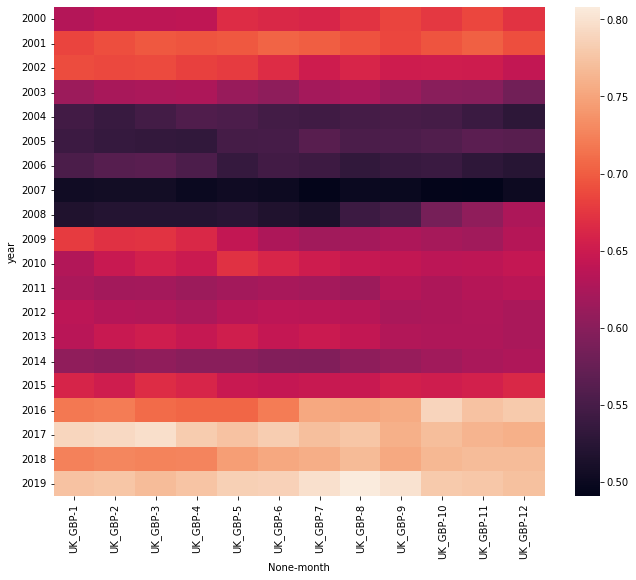

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(forex_m)
plt.show() 

#initial heat map from our data

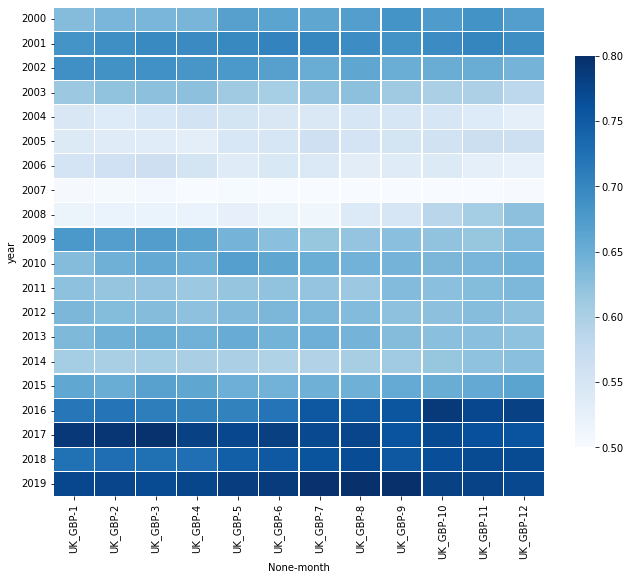

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(forex_m, cmap="Blues", vmin= 0.5, vmax=0.8,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

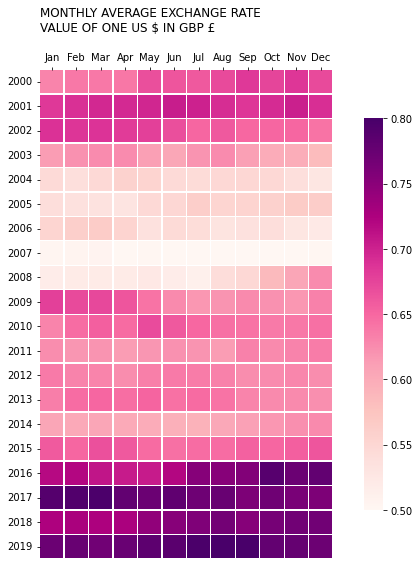

In [ ]:

fig, ax = plt.subplots(figsize=(11, 9))


sb.heatmap(forex_m, cmap="RdPu", vmin= 0.5, vmax=0.8, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one US $ in GBP £\n'.upper()
plt.title(title, loc='left')
plt.savefig('heatmap')
plt.show()

#more refined heat map for exporting